So the previous notebook just took the data as is, wrangled it a bit and worked with it that way. Beyond wrangling, you can also take different variables / columns and manipulate them a bunch to make a lot more different / slightly different variables to play with.

In [63]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [64]:
%%R 
library(tidyverse)
library(cowplot)
library(here)

In [65]:
import pandas as pd

In [66]:
%%R -o titanic_data
titanic_data <- read_csv(here("data/titanic.csv"))

Rows: 887 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Name, Sex
dbl (6): Survived, Pclass, Age, Siblings/Spouses Aboard, Parents/Children Ab...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [67]:
titanic_data

Survived  Pclass                                               Name  \
1         0.0     3.0                             Mr. Owen Harris Braund   
2         1.0     1.0  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
3         1.0     3.0                              Miss. Laina Heikkinen   
4         1.0     1.0        Mrs. Jacques Heath (Lily May Peel) Futrelle   
5         0.0     3.0                            Mr. William Henry Allen   
..        ...     ...                                                ...   
883       0.0     2.0                               Rev. Juozas Montvila   
884       1.0     1.0                        Miss. Margaret Edith Graham   
885       0.0     3.0                     Miss. Catherine Helen Johnston   
886       1.0     1.0                               Mr. Karl Howell Behr   
887       0.0     3.0                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
1      male  22.0                      1.0                      0.0   7.2500  
2    female  38.0                      1.0                      0.0  71.2833  
3    female  26.0                      0.0                      0.0   7.9250  
4    female  35.0                      1.0                      0.0  53.1000  
5      male  35.0                      0.0                      0.0   8.0500  
..      ...   ...                      ...                      ...      ...  
883    male  27.0                      0.0                      0.0  13.0000  
884  female  19.0                      0.0                      0.0  30.0000  
885  female   7.0                      1.0                      2.0  23.4500  
886    male  26.0                      0.0                      0.0  30.0000  
887    male  32.0                      0.0                      0.0   7.7500  

[887 rows x 8 columns]

So this is a pretty boring / limited dataset. THere's really only two columns with somewhat exciting data (Fare and Age). So a few things can be done to make these a bit more exciting.

1. Manipulate them in various ways
2. Combine them in various ways
3. Use them to fit a model, take output from model as new variable.


So we'll start with the first one. There are a couple of ways that can be done as well

1. gaps between consecutive values
   1. This can be done on the data in it's current form, but the gaps would be representative of the arbitrary order of the input. Doing it on the sorted data would be more meaningful, though generate potentially more boring data, if there are a lot of numbers near eachother.
2. Add / subtract / multiply / divide / transform
   1. An easy thing is to just add values to it. this can serve as a simple way to make copies of the data plots and move them around
   2. We can do a crazy thing and just take the Age values and add them iteratively to each column


In [68]:
titanic_data_copy = titanic_data.copy()

In [69]:
titanic_data_copy

Survived  Pclass                                               Name  \
1         0.0     3.0                             Mr. Owen Harris Braund   
2         1.0     1.0  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
3         1.0     3.0                              Miss. Laina Heikkinen   
4         1.0     1.0        Mrs. Jacques Heath (Lily May Peel) Futrelle   
5         0.0     3.0                            Mr. William Henry Allen   
..        ...     ...                                                ...   
883       0.0     2.0                               Rev. Juozas Montvila   
884       1.0     1.0                        Miss. Margaret Edith Graham   
885       0.0     3.0                     Miss. Catherine Helen Johnston   
886       1.0     1.0                               Mr. Karl Howell Behr   
887       0.0     3.0                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
1      male  22.0                      1.0                      0.0   7.2500  
2    female  38.0                      1.0                      0.0  71.2833  
3    female  26.0                      0.0                      0.0   7.9250  
4    female  35.0                      1.0                      0.0  53.1000  
5      male  35.0                      0.0                      0.0   8.0500  
..      ...   ...                      ...                      ...      ...  
883    male  27.0                      0.0                      0.0  13.0000  
884  female  19.0                      0.0                      0.0  30.0000  
885  female   7.0                      1.0                      2.0  23.4500  
886    male  26.0                      0.0                      0.0  30.0000  
887    male  32.0                      0.0                      0.0   7.7500  

[887 rows x 8 columns]

In [70]:
%%R -i titanic_data_copy
titanic_data_copy <- as.tibble(titanic_data_copy)

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [71]:
%%R
titanic_data_copy %>% 
	count(Survived, Sex)

# A tibble: 4 × 3
  Survived Sex        n
     <dbl> <chr>  <int>
1        0 female    81
2        0 male     464
3        1 female   233
4        1 male     109


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


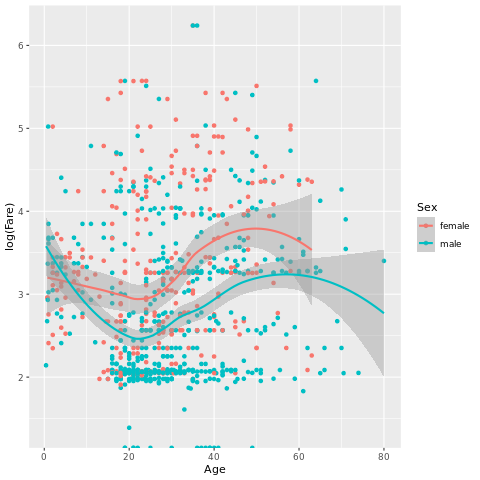

In [72]:
%%R 
titanic_data_copy %>% 
	ggplot(aes(x = Age, y = log(Fare), col = Sex)) +
	geom_point() +
	geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


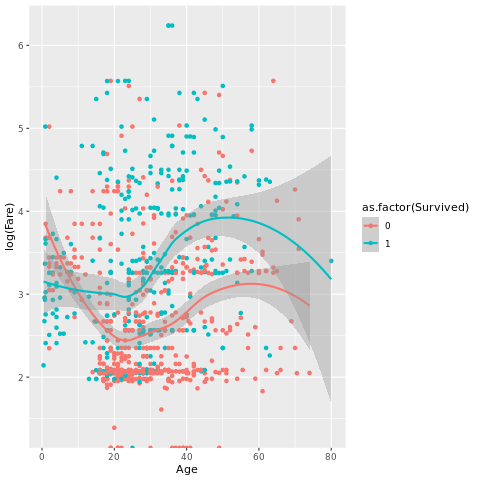

In [73]:
%%R 
titanic_data_copy %>% 
	ggplot(aes(x = Age, y = log(Fare), col = as.factor(Survived))) +
	geom_point() +
	geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


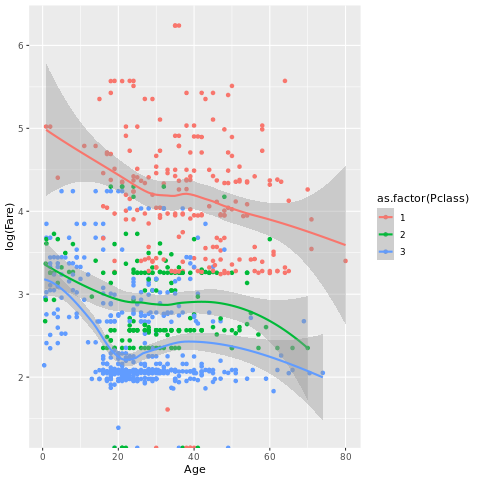

In [74]:
%%R 
titanic_data_copy %>% 
	ggplot(aes(x = Age, y = log(Fare), col = as.factor(Pclass))) +
	geom_point() +
	geom_smooth()

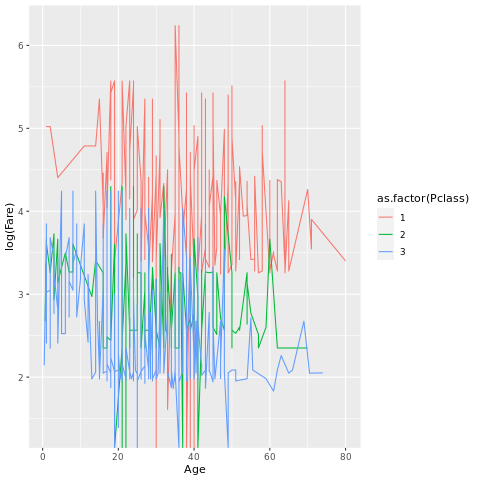

In [75]:
%%R 
titanic_data_copy %>% 
	ggplot(aes(x = Age, y = log(Fare), col = as.factor(Pclass))) +
	# geom_point() +
	geom_line()

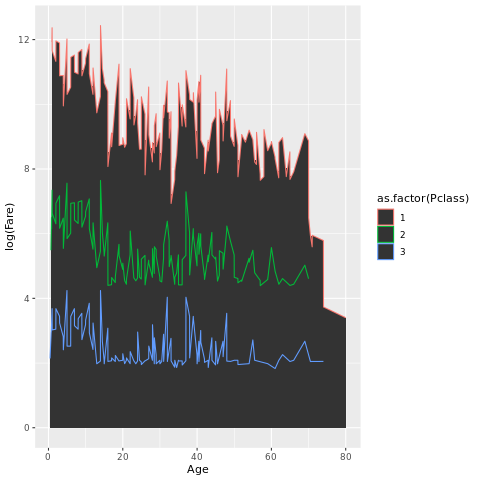

In [76]:
%%R 
titanic_data_copy %>% 
	ggplot(aes(x = Age, y = log(Fare), col = as.factor(Pclass))) +
	# geom_point() +
	geom_area()

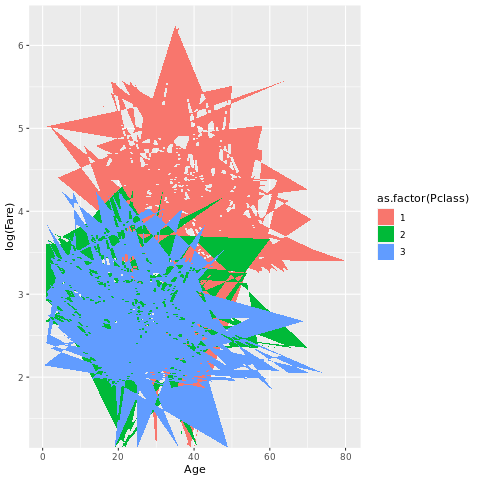

In [77]:
%%R 
titanic_data_copy %>% 
	ggplot(aes(x = Age, y = log(Fare), fill = as.factor(Pclass))) +
	# geom_point() +
	geom_polygon()

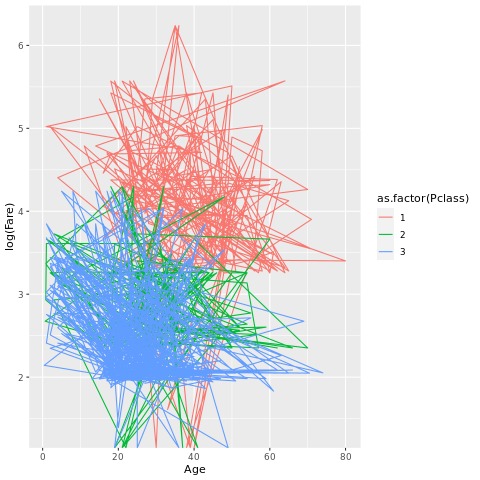

In [78]:
%%R 
titanic_data_copy %>% 
	ggplot(aes(x = Age, y = log(Fare), col = as.factor(Pclass))) +
	# geom_point() +
	geom_path()

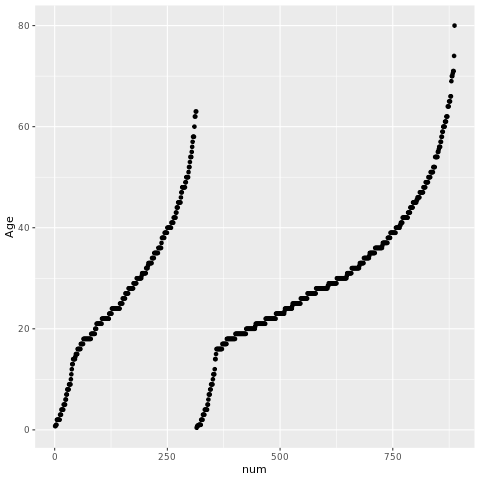

In [79]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Age, x = num)) +
		geom_point()

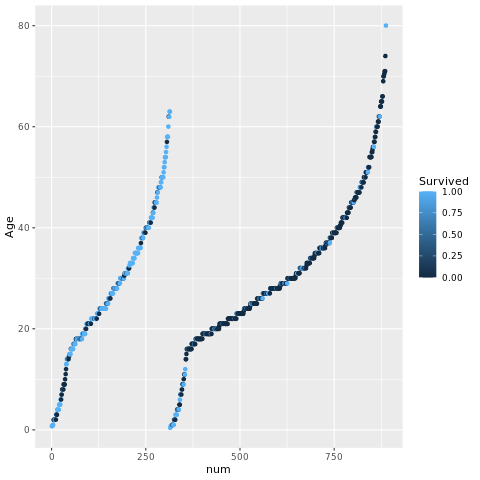

In [80]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Age, x = num, col = Survived)) +
		geom_jitter()

This basically summarrizes what's really going on with the dataset. Women and children were saved. 

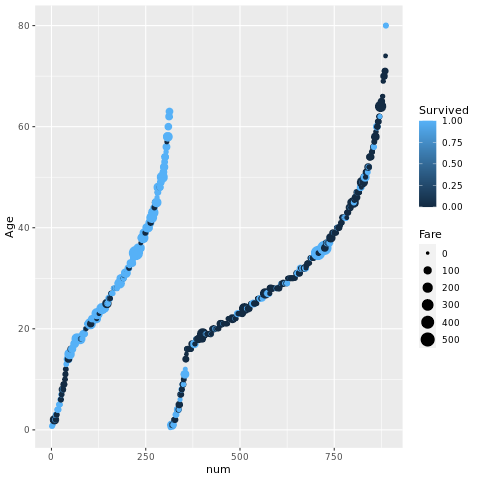

In [81]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Age, x = num, col = Survived, size = Fare)) +
		geom_point()

One thing I think would be a neat visual for this, and actually have some intrepratability. Would be to plot these points, but draw lines from each point to either the top left corner (0,80) for survived and bottom right (~800,0) for not survived

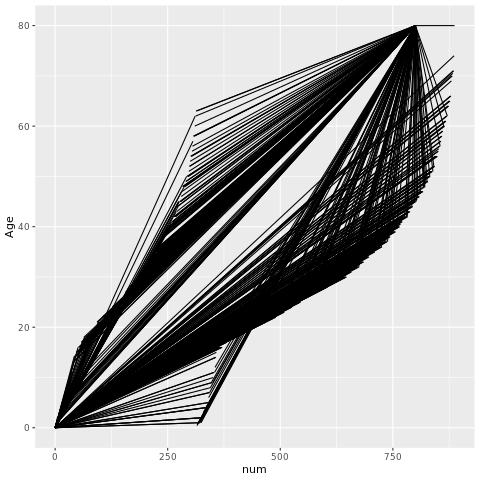

In [82]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>%
	ggplot(aes(y = Age, x = num)) +
		# geom_point() +
		geom_segment(aes(xend=Survived*800, yend = Survived*80))

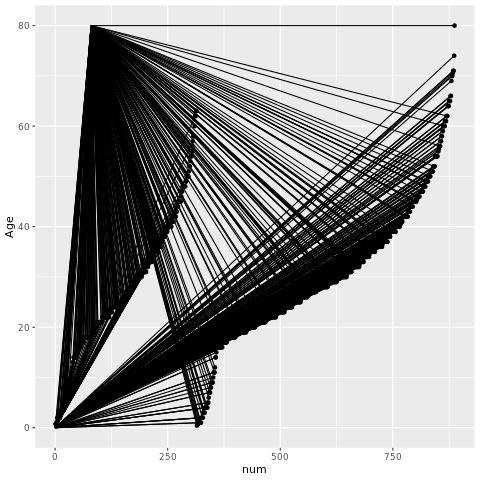

In [83]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>%
	ggplot(aes(y = Age, x = num)) +
		geom_point() +
		geom_segment(aes(xend=Survived*80, yend = Survived*80))

Survived
0 <- x = 0, y = 80
1 <- x = 800, y = 0

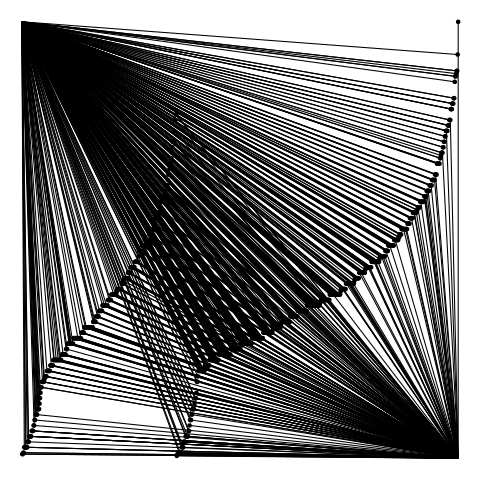

In [84]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>%
	mutate(
		survived_x = case_when(
			Survived == 0 ~ 0,
			Survived == 1 ~ 887
		),
		survived_y = case_when(
			Survived == 0 ~ 80,
			Survived == 1 ~ 0
		)
	) %>%
	ggplot(aes(y = Age, x = num)) +
		geom_point() +
		geom_segment(aes(xend=survived_x, yend = survived_y)) +
		theme_nothing()

There it is! That's what we want!!!

Wow, alright, I'm feeling pretty good about the fun starting places to dive deeper into just using this dataset. I think I already have enough to go off of! That's without doing to much crazy data mangling.

Though honestly, it's a bit of a hard dataset to get anything really exciting from data mangling. So I really think I've hit my limits on what can be done with this dataset.

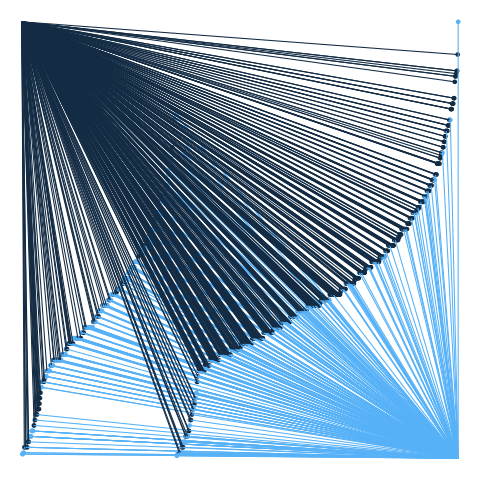

In [86]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>%
	mutate(
		survived_x = case_when(
			Survived == 0 ~ 0,
			Survived == 1 ~ 887
		),
		survived_y = case_when(
			Survived == 0 ~ 80,
			Survived == 1 ~ 0
		)
	) %>%
	ggplot(aes(y = Age, x = num, col = Survived)) +
		geom_point() +
		geom_segment(aes(xend=survived_x, yend = survived_y)) +
		theme_nothing()

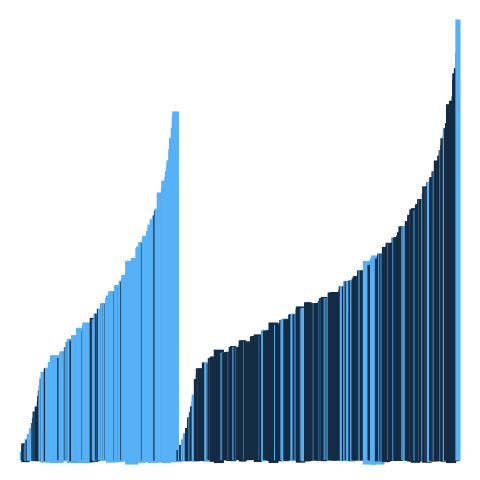

In [25]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Age, x = num, col = Survived, size = Fare)) +
		geom_bar(stat = "identity") +
		theme_nothing()

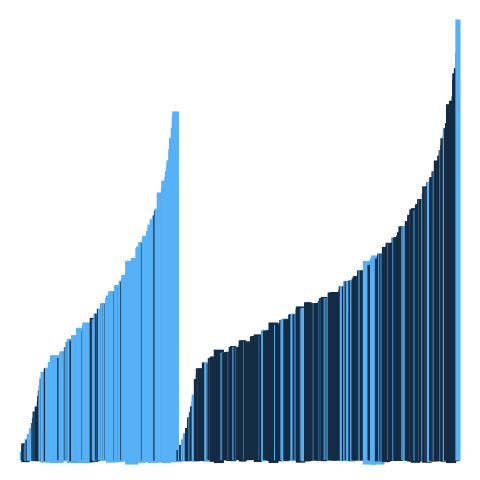

In [26]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Age, x = num, 
		col = Survived, 
		size = Fare
		)) +
		geom_bar(stat = "identity") +
		theme_nothing()

I like the shape, I think some recoloring would make it look nice. Maybe more iceberg colors?...d

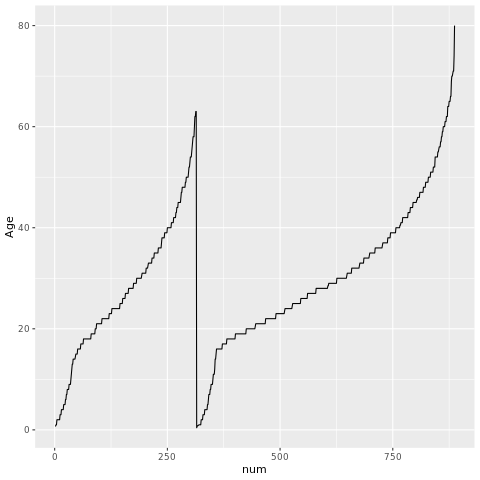

In [27]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Age, x = num)) +
		geom_line()

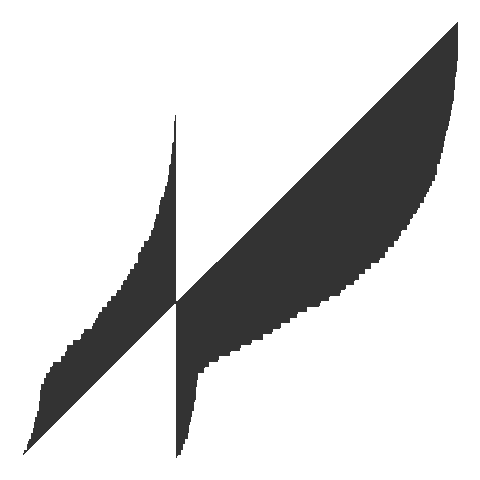

In [28]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Age, x = num)) +
		geom_polygon() +
		theme_nothing()

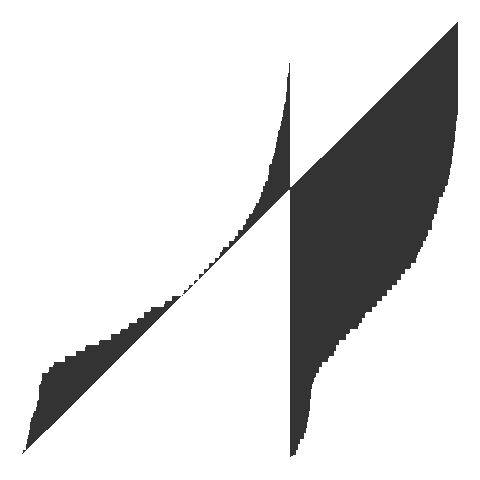

In [29]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Survived) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Age, x = num)) +
		geom_polygon() +
		theme_nothing()

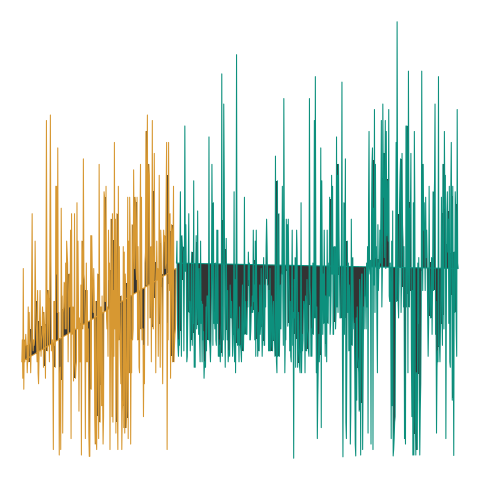

In [30]:
%%R 
titanic_data_copy %>% 
	arrange(Fare) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Age, x = num, col = Sex)) +
		geom_polygon() +
		scale_color_manual(values=c("#D79832","#0D907D")) +
		theme_nothing()

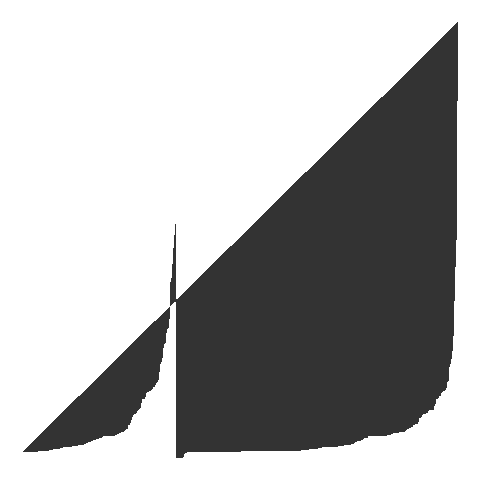

In [31]:
%%R 
titanic_data_copy %>% 
	arrange(Fare) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Fare, x = num)) +
		geom_polygon() +
		theme_nothing()

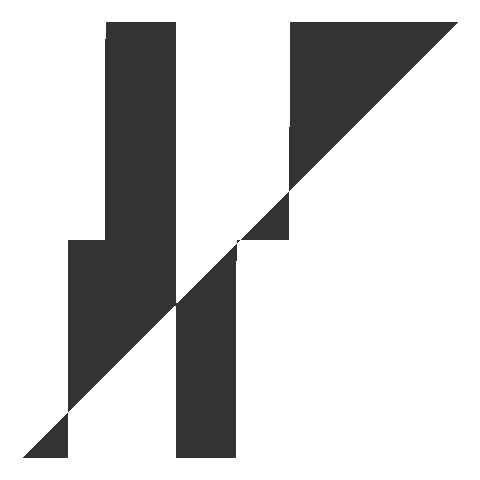

In [32]:
%%R 
titanic_data_copy %>% 
	arrange(Pclass) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Pclass, x = num)) +
		geom_polygon() +
		theme_nothing()

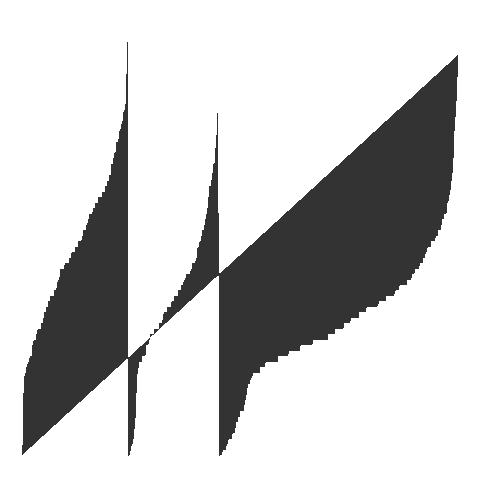

In [33]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Pclass) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Age, x = num)) +
		geom_polygon() +
		theme_nothing()

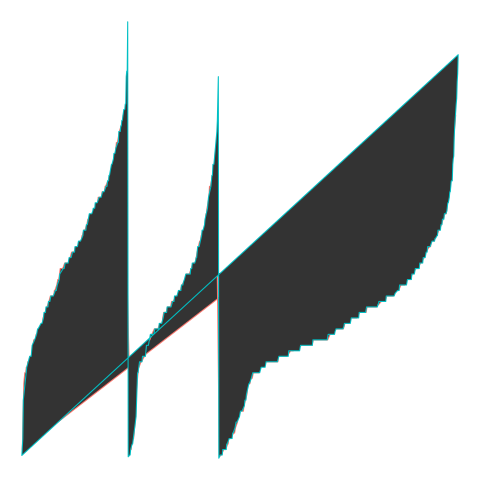

In [34]:
%%R 
titanic_data_copy %>% 
	arrange(Age) %>% 
	arrange(Pclass) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Age, x = num, col = Sex)) +
		geom_polygon() +
		theme_nothing()

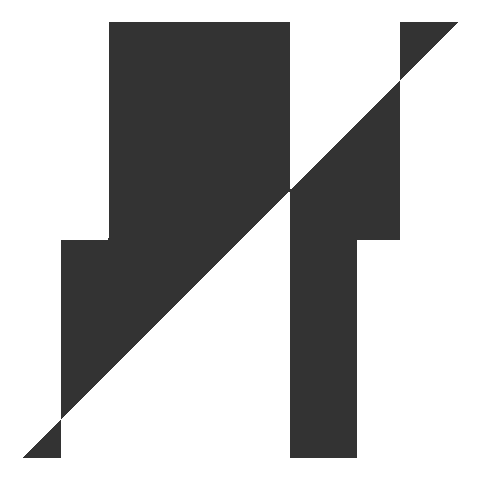

In [35]:
%%R 
titanic_data_copy %>% 
	arrange(Pclass) %>% 
	arrange(Survived) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Pclass, x = num)) +
		geom_polygon() +
		theme_nothing()

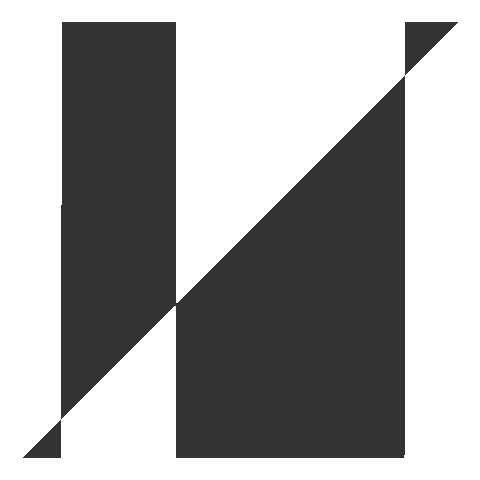

In [36]:
%%R 
titanic_data_copy %>% 
	arrange(Survived) %>% 
	arrange(Sex) %>% 
	mutate(num = 1:n()) %>% 
	ggplot(aes(y = Survived, x = num)) +
		geom_polygon() +
		theme_nothing()

# additive grid

In [37]:
ages = list(titanic_data_copy["Age"])
for i in range(len(ages)):
	age = ages[i]
	# print(age, f"Age_{i}")
	titanic_data_copy[f"Age_{i}"] = titanic_data_copy["Age"] + age

/tmp/ipykernel_5935/3313477805.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  titanic_data_copy[f"Age_{i}"] = titanic_data_copy["Age"] + age
/tmp/ipykernel_5935/3313477805.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  titanic_data_copy[f"Age_{i}"] = titanic_data_copy["Age"] + age
/tmp/ipykernel_5935/3313477805.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

In [38]:
titanic_data_copy

Survived  Pclass                                               Name  \
1         0.0     3.0                             Mr. Owen Harris Braund   
2         1.0     1.0  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
3         1.0     3.0                              Miss. Laina Heikkinen   
4         1.0     1.0        Mrs. Jacques Heath (Lily May Peel) Futrelle   
5         0.0     3.0                            Mr. William Henry Allen   
..        ...     ...                                                ...   
883       0.0     2.0                               Rev. Juozas Montvila   
884       1.0     1.0                        Miss. Margaret Edith Graham   
885       0.0     3.0                     Miss. Catherine Helen Johnston   
886       1.0     1.0                               Mr. Karl Howell Behr   
887       0.0     3.0                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  \
1      male  22.0                      1.0                      0.0   7.2500   
2    female  38.0                      1.0                      0.0  71.2833   
3    female  26.0                      0.0                      0.0   7.9250   
4    female  35.0                      1.0                      0.0  53.1000   
5      male  35.0                      0.0                      0.0   8.0500   
..      ...   ...                      ...                      ...      ...   
883    male  27.0                      0.0                      0.0  13.0000   
884  female  19.0                      0.0                      0.0  30.0000   
885  female   7.0                      1.0                      2.0  23.4500   
886    male  26.0                      0.0                      0.0  30.0000   
887    male  32.0                      0.0                      0.0   7.7500   

     Age_0  Age_1  ...  Age_877  Age_878  Age_879  Age_880  Age_881  Age_882  \
1     44.0   60.0  ...     55.0     44.0     50.0     47.0     61.0     49.0   
2     60.0   76.0  ...     71.0     60.0     66.0     63.0     77.0     65.0   
3     48.0   64.0  ...     59.0     48.0     54.0     51.0     65.0     53.0   
4     57.0   73.0  ...     68.0     57.0     63.0     60.0     74.0     62.0   
5     57.0   73.0  ...     68.0     57.0     63.0     60.0     74.0     62.0   
..     ...    ...  ...      ...      ...      ...      ...      ...      ...   
883   49.0   65.0  ...     60.0     49.0     55.0     52.0     66.0     54.0   
884   41.0   57.0  ...     52.0     41.0     47.0     44.0     58.0     46.0   
885   29.0   45.0  ...     40.0     29.0     35.0     32.0     46.0     34.0   
886   48.0   64.0  ...     59.0     48.0     54.0     51.0     65.0     53.0   
887   54.0   70.0  ...     65.0     54.0     60.0     57.0     71.0     59.0   

     Age_883  Age_884  Age_885  Age_886  
1       41.0     29.0     48.0     54.0  
2       57.0     45.0     64.0     70.0  
3       45.0     33.0     52.0     58.0  
4       54.0     42.0     61.0     67.0  
5       54.0     42.0     61.0     67.0  
..       ...      ...      ...      ...  
883     46.0     34.0     53.0     59.0  
884     38.0     26.0     45.0     51.0  
885     26.0     14.0     33.0     39.0  
886     45.0     33.0     52.0     58.0  
887     51.0     39.0     58.0     64.0  

[887 rows x 895 columns]

Hell yeah! Now we got something crazy to play with!

In [39]:
%%R -i titanic_data_copy
titanic_data_copy <- as.tibble(titanic_data_copy)

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [40]:
%%R 
titanic_data_copy <- titanic_data_copy %>% 
	mutate(row = 1:n()) %>% 
	pivot_longer(Age_0:Age_886, names_to = "Age_col", values_to = "col_age") %>% 
	separate(Age_col, c(NA, "column"))


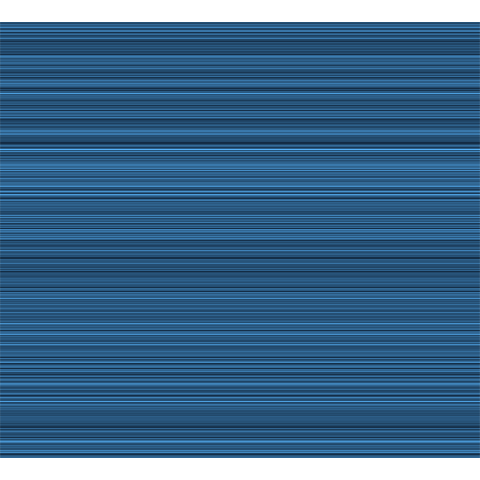

In [41]:
%%R 
titanic_data_copy %>% 
	# sample_n( 10000) %>%
	ggplot(aes(y = row, x = column, fill = Age)) + 
		geom_raster() + 
		theme_nothing()

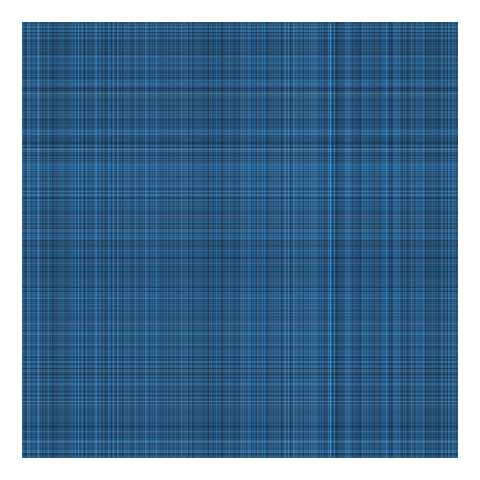

In [42]:
%%R 
titanic_data_copy %>% 
	# sample_n( 10000) %>%
	ggplot(aes(y = row, x = as.numeric(column), fill = col_age)) + 
		geom_raster() + 
		theme_nothing()

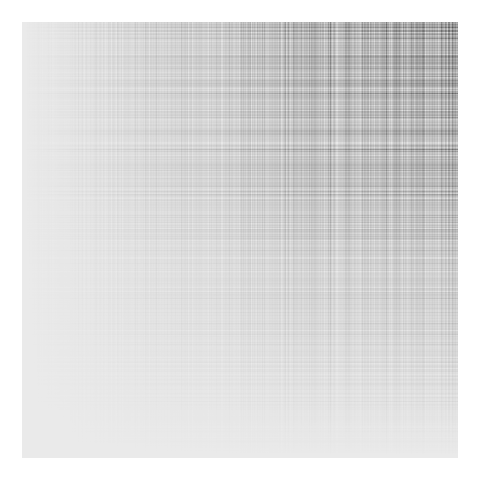

In [43]:
%%R 
titanic_data_copy %>% 
	# sample_n( 10000) %>%
	ggplot(aes(y = row, x = as.numeric(column), alpha = col_age*(as.numeric(column) * row), col= row)) + 
		geom_raster() + 
		theme_nothing()

Yeah, so I mean that's basically what we have to work with..

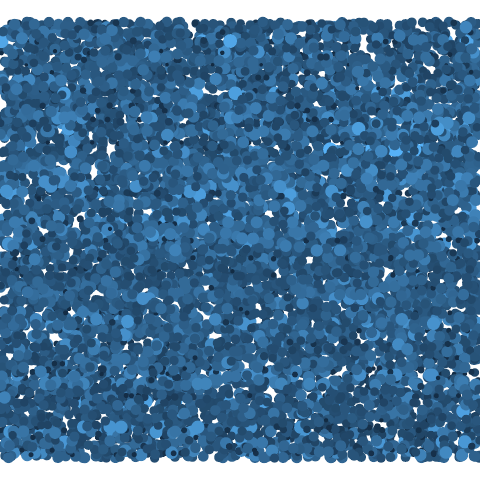

In [44]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	ggplot(aes(y = row, x = column, col=Age, size = Age)) + 
		geom_jitter() +
		theme_nothing()

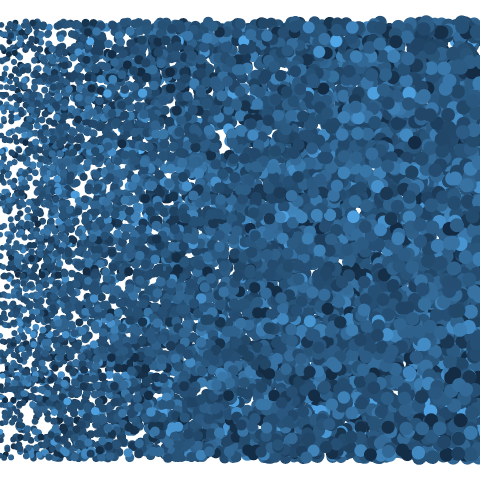

In [45]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	ggplot(aes(y = row, x = column, col=Age, size = column)) + 
		geom_jitter() +
		theme_nothing()

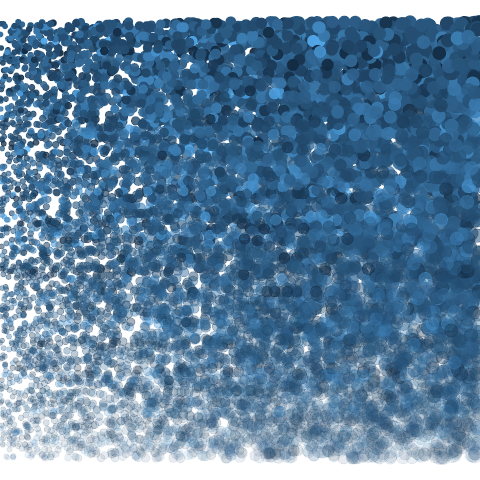

In [46]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	ggplot(aes(y = row/2, x = column, col=Age, size = column, alpha = row)) + 
		geom_jitter() +
		theme_nothing()

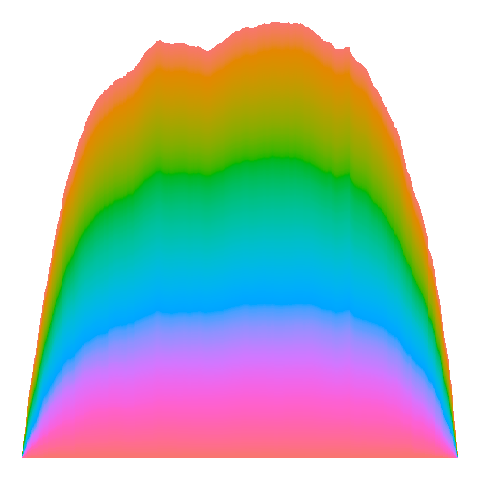

In [47]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	# mutate(column_num = as.numeric(column)) %>%
	ggplot(aes(y = col_age, x = row, fill = column)) +
		geom_area() + 
		theme_nothing()

Hmm, so the colors are not super exciting, but this could have potential!

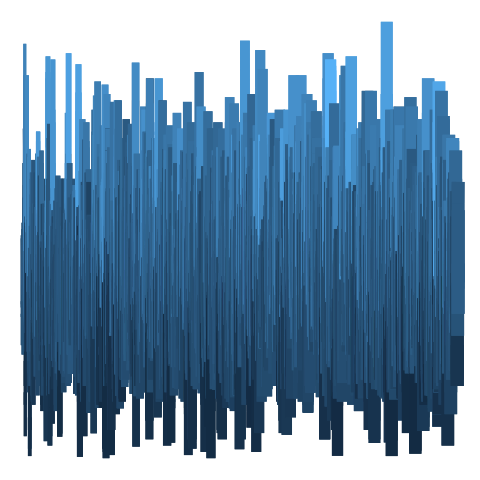

In [48]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	mutate(column_num = as.numeric(column)) %>%
	ggplot(aes(y = col_age, x = row, col = Age, size = row)) +
		# geom_point() +
		geom_line() +
		theme_nothing()

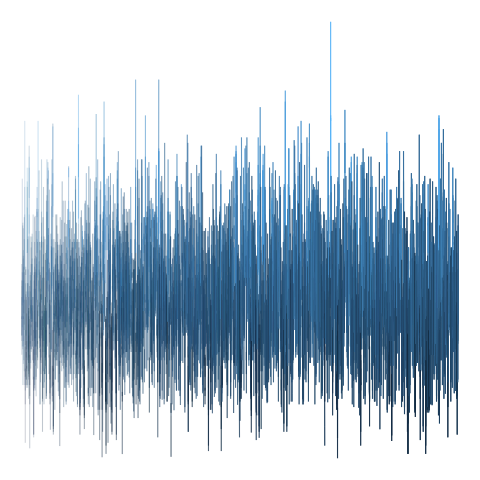

In [49]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	mutate(column_num = as.numeric(column)) %>%
	ggplot(aes(y = col_age, x = row, col = Age, alpha = row)) +
		# geom_point() +
		geom_line() +
		theme_nothing()

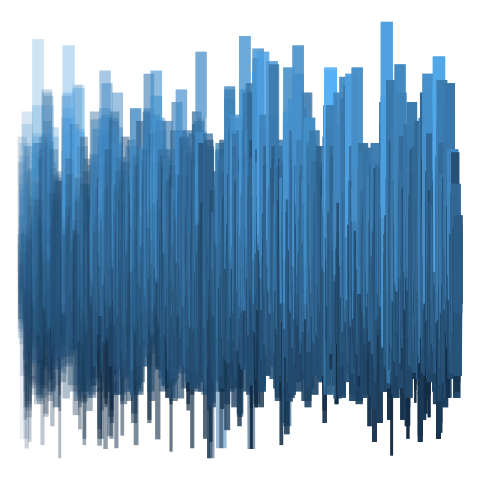

In [50]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	mutate(column_num = as.numeric(column)) %>%
	ggplot(aes(y = col_age, x = row, col = Age, size = Age, alpha = row)) +
		# geom_point() +
		geom_line() +
		theme_nothing()

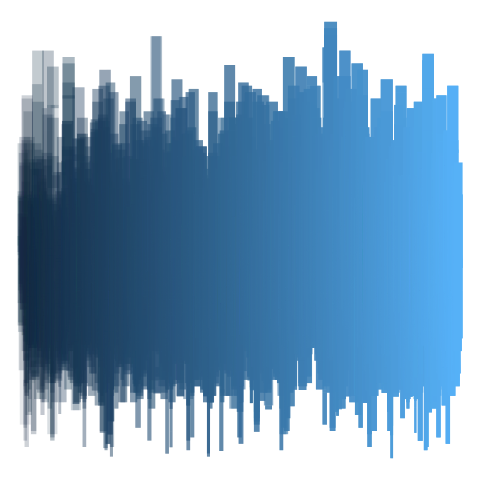

In [51]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	mutate(column_num = as.numeric(column)) %>%
	ggplot(aes(y = col_age, x = row, col = row, size = Age, alpha = row)) +
		# geom_point() +
		geom_line() +
		theme_nothing()

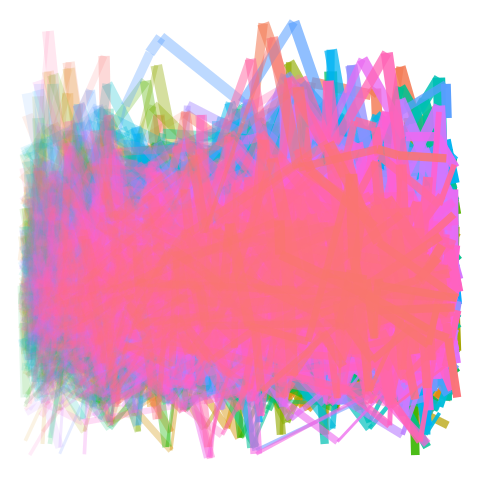

In [52]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	mutate(column_num = as.numeric(column)) %>%
	ggplot(aes(y = col_age, x = row, col = column, size = Age, alpha = row)) +
		# geom_point() +
		geom_line() +
		theme_nothing()

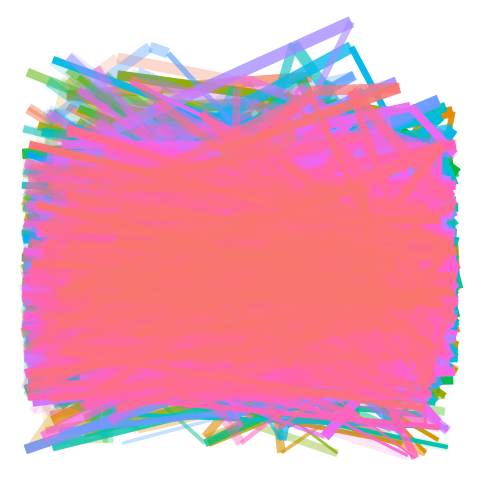

In [53]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	mutate(column_num = as.numeric(column)) %>%
	ggplot(aes(y = col_age, x = row, col = column, size = Age, alpha = row)) +
		# geom_point() +
		geom_path() +
		theme_nothing()

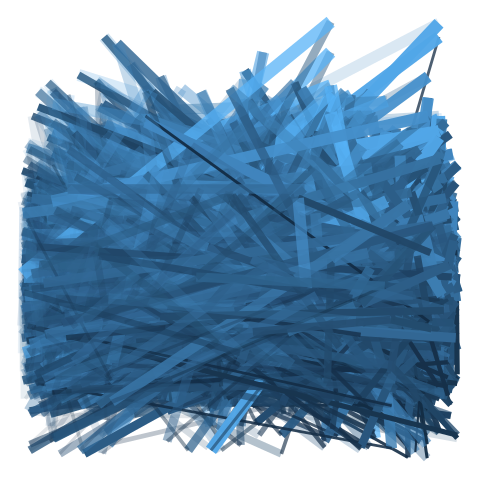

In [54]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	mutate(column_num = as.numeric(column)) %>%
	ggplot(aes(y = col_age, x = row, col = Age, size = Age, alpha = row)) +
		# geom_point() +
		geom_path() +
		theme_nothing()

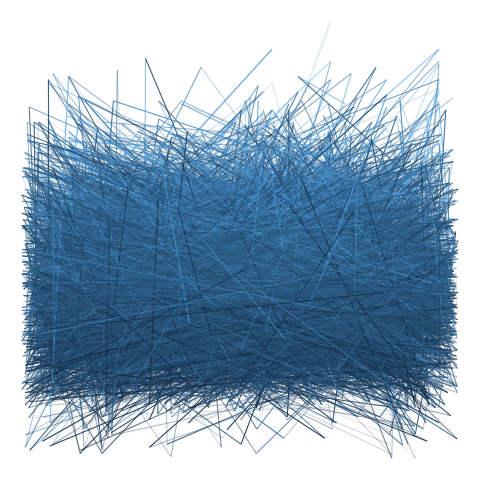

In [55]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	mutate(column_num = as.numeric(column)) %>%
	ggplot(aes(y = col_age, x = row, col = Age, alpha = as.numeric(column))) +
		
		geom_path() +
		theme_nothing()

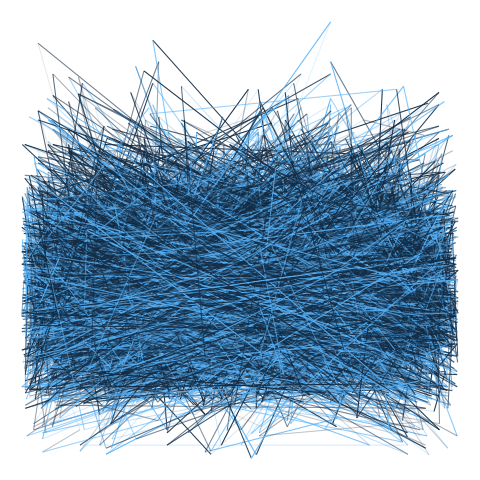

In [56]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	mutate(column_num = as.numeric(column)) %>%
	ggplot(aes(y = col_age, x = row, col = Survived, alpha = as.numeric(column))) +
		
		geom_path() +
		theme_nothing()

In [57]:
# %%R 
# titanic_data_copy %>% 
# 	sample_n( 10000) %>%
# 	mutate(column_num = as.numeric(column)) %>%
# 	ggplot(aes(y = col_age, x = Age )) +
		
# 		geom_polygon() +
# 		theme_nothing()

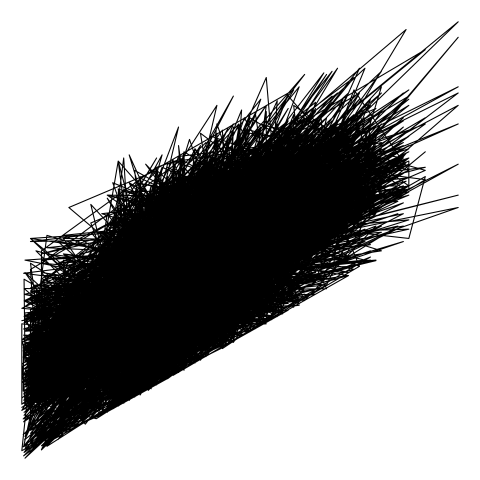

In [58]:
%%R 
titanic_data_copy %>% 
	sample_n( 10000) %>%
	mutate(column_num = as.numeric(column)) %>%
	ggplot(aes(y = col_age, x = Age )) +
		
		geom_path() +
		theme_nothing()

So this did serve as a pretty quick way of getting lots of data. Not as many immediately interesting avenues of pursuit though. Not quite sure why raster didn't give anything, might be worth looking into. Potentially, this could be a source for a backdrop / texture. 

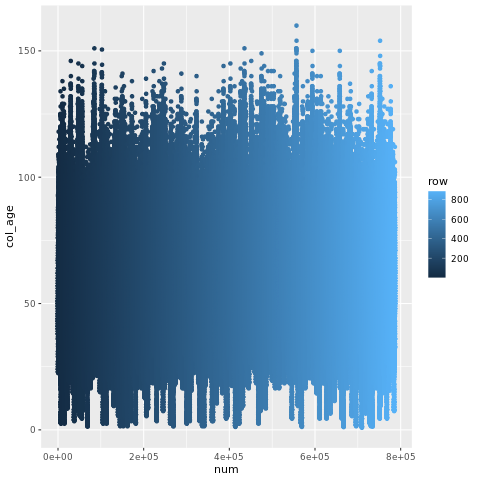

In [59]:
%%R 
titanic_data_copy %>% 
mutate(num = 1:n()) %>% 
ggplot(aes(y = col_age, x = num, col = row)) +
	geom_point()

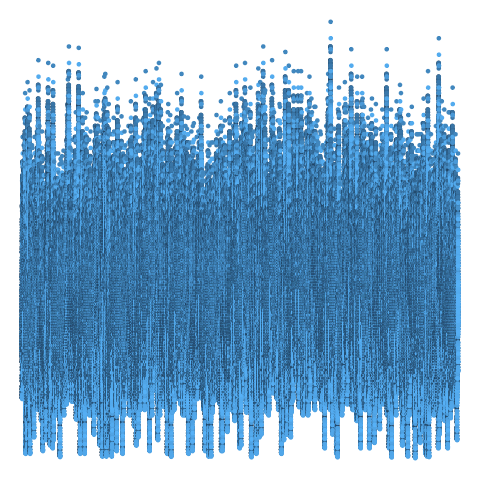

In [60]:
%%R 
titanic_data_copy %>% 
mutate(num = 1:n()) %>% 
ggplot(aes(y = col_age, x = num, col = as.numeric(column))) +
	geom_point() +
	theme_nothing()

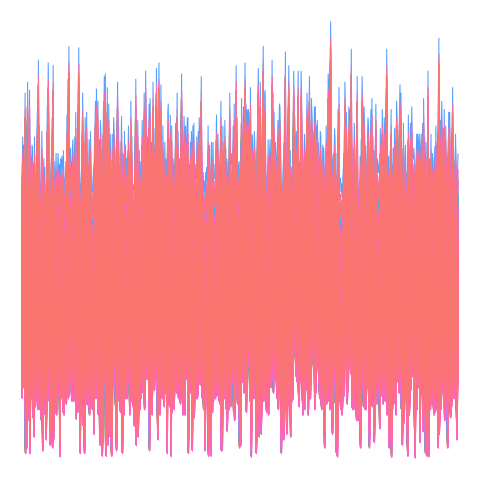

In [61]:
%%R 
titanic_data_copy %>% 
mutate(num = 1:n()) %>% 
ggplot(aes(y = col_age, x = num, col = column)) +
	geom_line() +
	theme_nothing()